# My First Machine Learning End To End Project

#### Dataset Details

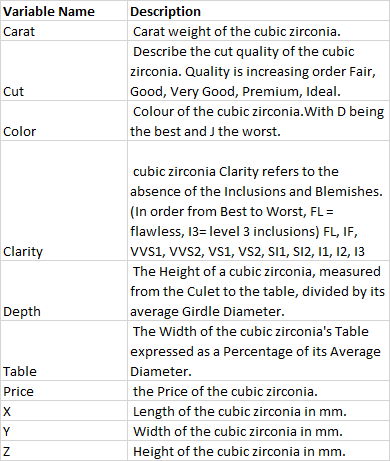

In [3]:
import pandas as pd

# Data Ingestion Steps:

In data ingestion we read the data from databases or somewhere else.

In [13]:
# Read the dataset
df = pd.read_csv("data/gemstone.csv") # Our current folder is also inside the notebooks folder.

In [14]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


#### In EDA, We probably do the info, missing values, descriptive statistics and extra.,

#### 1. Finding missing values

In [15]:
# Missing Values
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### No missing values present in the data (No missing values present overhere)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


Here object datatypes columns are categorical variables, rest all other columns are numerical variables.

In [17]:
df.head() # Here, We can able to see color, cut, clarity is a categorical variable

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


On Feature Engineering Part, We should convert all the categorical values into the integer values.

In our data id column is not important, so for that we drop that, id is a unique value, so we can drop this id column

#### 2. Dropping Unneccasary Columns

In [20]:
# Dropping id columns - Id is not playing a very important role for prediction, Its just like a roll number.
# For eg, with the help of aadhar card number, can we predict the are we rich or poor? - NO

# CAN I SAY - Dropping a columns is also a part of feature engineering? - YES

df = df.drop(labels = ["id"], axis=1)

In [22]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


#### 3. Checking duplicated records

In [24]:
df.duplicated().sum()

0

No same records present over there.

Why we should dropping duplicates?

    It not a meaning having a same data, its taking a extra time for our model.

In [ ]:
# How do we remove duplicates?
# df.drop_duplicates()

In [27]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


We know that, the above three columns are categorical variables. so we should convert the caterical into numerical values

#### The very first step is we splitting numerical and categorical columns

#### 4. Seggregate numerical and categorical columns

Why I am seggregating numerical and categorical columns?

    For EDA Purpose.

In [34]:
numerical_columns = df.columns[df.dtypes != "object"]

In [35]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [36]:
categorical_columns = df.columns[df.dtypes == "object"]

In [37]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [43]:
print("Numerical Columns: ", numerical_columns)
print("Categorical Columns: ", categorical_columns)

Numerical Columns:  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns:  Index(['cut', 'color', 'clarity'], dtype='object')


In [45]:
# Can we check the describe functionality for all the categorical columns?

df[categorical_columns].describe()
# For categorical I am getting this, For numerical columns I will get mean, mode, median, ....

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


Frequency is nothing but number of times occurences

In [49]:
df["cut"].value_counts() # This is why we got 92454 frequency value there.

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [50]:
df["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [51]:
df["cut"].nunique() # We have 5 only unique values there, so for that we can use one hot encoding

5

In [52]:
df["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [53]:
df["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

#### 5. Plotting Numerical Columns

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
plt.figure(figsize=(10,10))
x = 1
for i in numerical_columns:
    sns.histplot(data=df, x=i, kde=True)

KeyboardInterrupt: 